Comparative study of **ANN** and **CNN** on CIFAR-10 image classification, including CNN performance with and without **data augmentation** using Keras

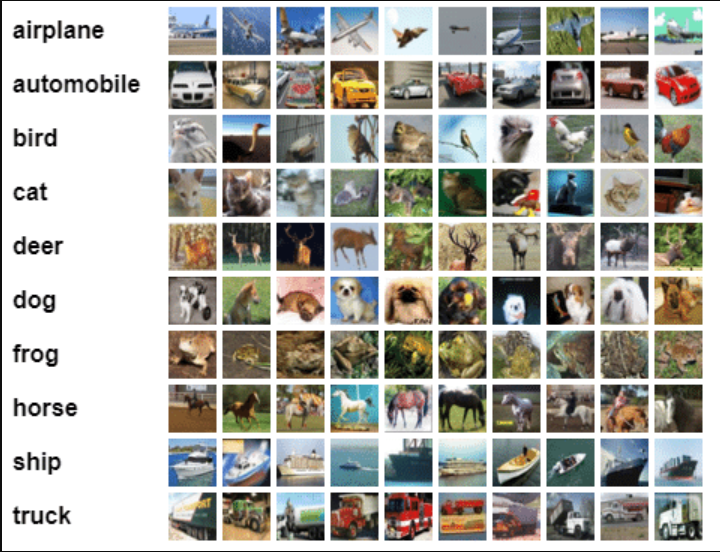

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Data exploration**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 545s 3us/step


(50000, 32, 32, 3)

Training sample is 50,000. each sample is 32*32 image. 3 is for rgb chanel.

In [3]:
X_test.shape

(10000, 32, 32, 3)

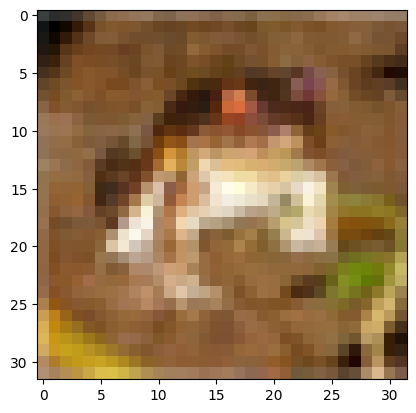

In [4]:
plt.imshow(X_train[0])

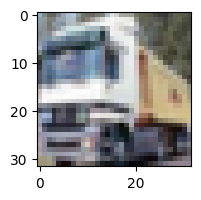

In [5]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane", "automobile", "bird", "cat","deer","dog","frog","horse","ship","truck" ]

In [10]:
classes[9]

'truck'

In [11]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

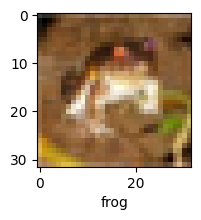

In [12]:
plot_sample(X_train, y_train, 0)

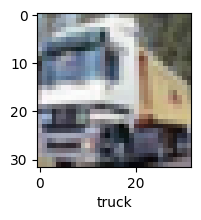

In [13]:
plot_sample(X_train, y_train, 1)

**NORMALIZATION**

In [14]:
X_train = X_train / 255
X_test = X_test / 255

# **Build simple artificial neural network for image classification**

We implement a simple **ANN** for CIFAR-10 classification:

- Input images are **flattened** into a 1D vector.
- Two hidden layers with **3000** and **1000 neurons** (ReLU activation).
- Output layer has **10 neurons** (softmax activation) for the 10 classes.
- Model is compiled with **SGD optimizer** and **sparse categorical crossentropy** loss.
- Trained for **5 epochs**.

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.2993 - loss: 1.9321
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4220 - loss: 1.6420
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.4540 - loss: 1.5531
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.4720 - loss: 1.4959
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.4976 - loss: 1.4306


**Confusion Matrix (ANN):**

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.43      0.52      1000
           1       0.71      0.38      0.49      1000
           2       0.36      0.40      0.38      1000
           3       0.41      0.15      0.22      1000
           4       0.43      0.40      0.41      1000
           5       0.38      0.44      0.40      1000
           6       0.55      0.54      0.54      1000
           7       0.41      0.69      0.51      1000
           8       0.72      0.46      0.56      1000
           9       0.39      0.75      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



## **Now let us build a convolutional neural network to train our images**

We implement a **CNN** for CIFAR-10 image classification:

- Two convolutional layers:
  - **Conv2D(32, 3x3)** → ReLU → **MaxPooling(2x2)**
  - **Conv2D(64, 3x3)** → ReLU → **MaxPooling(2x2)**
- Flatten the feature maps before fully connected layers.
- Dense layer with **64 neurons** (ReLU).
- Output layer with **10 neurons** (softmax) for 10 classes.

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3866 - loss: 1.6808
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6052 - loss: 1.1375
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6601 - loss: 0.9747
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6908 - loss: 0.8908
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7216 - loss: 0.8113
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7394 - loss: 0.7572
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7572 - loss: 0.6984
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7672 - loss: 0.6638
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7856 - loss: 0.6139
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.7955 - loss: 0.5757


In [19]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7070 - loss: 0.8908


[0.9069254994392395, 0.7021999955177307]

# **DATA AUGMENTATION**

In [20]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

## **CNN WITH AUGMENTATION**

In [27]:
cnn_aug_model = models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_aug_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
cnn_aug_history = cnn_aug_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.7055 - loss: 0.8415 - val_accuracy: 0.7205 - val_loss: 0.8197
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.7042 - loss: 0.8439 - val_accuracy: 0.7233 - val_loss: 0.8074
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.7095 - loss: 0.8319 - val_accuracy: 0.7175 - val_loss: 0.8212
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.7161 - loss: 0.8103 - val_accuracy: 0.7238 - val_loss: 0.7987
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.7170 - loss: 0.8063 - val_accuracy: 0.7317 - val_loss: 0.7822
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.7236 - loss: 0.7870 - val_accuracy: 0.7248 - val_loss: 0.8085
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.7263 - loss: 0.7904 - val_accuracy: 0.7254 - val_loss: 0.8092
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7241 - loss

In [32]:
cnn_aug_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7483 - loss: 0.7519


[0.7489349842071533, 0.7495999932289124]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


array([[1.68730054e-04, 2.25036492e-05, 5.25626913e-03, 6.50709093e-01,
        2.26310594e-03, 7.04758987e-02, 2.67951638e-01, 2.44771742e-04,
        2.66547431e-03, 2.42612979e-04],
       [6.83222781e-04, 2.95985471e-02, 2.05054712e-05, 1.30983631e-06,
        4.41296351e-08, 2.66970943e-08, 1.72535763e-07, 1.53200350e-08,
        9.69575346e-01, 1.20800185e-04],
       [2.06823889e-02, 6.98990226e-02, 1.08622957e-03, 4.55218041e-03,
        3.26194102e-04, 6.01542881e-04, 1.51636064e-04, 3.92788643e-05,
        8.84514928e-01, 1.81465484e-02],
       [4.19268280e-01, 3.10106054e-02, 1.25684872e-01, 5.00567676e-03,
        2.58469403e-01, 1.54159512e-04, 1.10444531e-01, 3.63028841e-03,
        4.62961122e-02, 3.60264494e-05],
       [4.59319881e-06, 5.02546645e-05, 3.88299562e-02, 1.30649537e-01,
        2.68937171e-01, 2.62345956e-03, 5.58556437e-01, 5.66955032e-06,
        3.42447165e-04, 4.86041245e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
classes[y_classes[3]]

'airplane'